# 원, 사각형, 삼각형 구분하기
- 어려운 테스트 문제를 데이터 부풀리기를 이용하여 데이터를 많이 생성
- 기존 CNN 모델 사용

In [1]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [2]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

In [3]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

- 데이터셋 생성하기

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0,                   # randomly rotate images in the range (deg 0 to 180)
    width_shift_range=0.1,              # randomly shift images horizontally
    height_shift_range=0.1,             # randomly shift images vertically
    shear_range=0.,                     # set range for random shear
    zoom_range=[0.8, 1.5],              # 0.8 ~ 1.5배로 임의로 확대/축소
    horizontal_flip=True,               # randomly flip images
    vertical_flip=False,                # randomly flip images
    fill_mode='nearest',                # set mode for filling points outside the input boundaries
)

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('hard_handwriting/train/triangle/triangle001.png')
x = img_to_array(img)
x.shape

(24, 24, 3)

In [6]:
# x.reshape(1, 24, 24, 3)
x = x.reshape((1, ) + x.shape)
x.shape

(1, 24, 24, 3)

- 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지

In [7]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [9]:
cnt = 0
for _ in train_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='pre'):
    cnt += 1
    if cnt >= 30:
        break

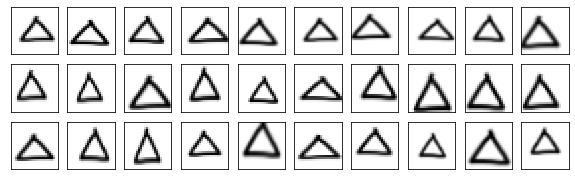

In [10]:
plt.figure(figsize=(10, 3))
for i, fname in enumerate(glob('preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

- data generator

In [ ]:
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size=(24, 24),
    batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size=(24, 24),
    batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습

In [ ]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([Conv2D(32, (3, 3), input_shape=(24, 24, 3), activation='relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(3, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
model.fit(train_data_generator, steps_per_epoch=15, epochs=300, validation_data=test_data_generator, validation_steps=5)    # epochs=300 할 때마다 이미지 바뀜?

Epoch 1/300
15/15 [==============================] - 0s 28ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.4894 - val_accuracy: 0.5333
Epoch 2/300
15/15 [==============================] - 0s 25ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.3106 - val_accuracy: 0.6667
Epoch 3/300
15/15 [==============================] - 0s 26ms/step - loss: 0.0953 - accuracy: 0.9556 - val_loss: 2.5671 - val_accuracy: 0.6000
Epoch 4/300
15/15 [==============================] - 0s 27ms/step - loss: 0.0736 - accuracy: 0.9556 - val_loss: 3.0726 - val_accuracy: 0.5333
Epoch 5/300
15/15 [==============================] - 0s 26ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 2.9935 - val_accuracy: 0.5333
Epoch 6/300
15/15 [==============================] - 0s 25ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 2.2621 - val_accuracy: 0.6667
Epoch 7/300
15/15 [==============================] - 0s 24ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.2768 - val_accuracy: 0.6667
Epoch 

In [ ]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 7ms/step - loss: 3.7097 - accuracy: 0.6667


[3.709679126739502, 0.6666666865348816]